In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_exames=pd.read_csv("1698696961761-attachment.csv")
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [3]:
# Remover id paciente
df_exames.drop("id_paciente",axis=1,inplace=True)
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genero     100 non-null    object
 1   idade      100 non-null    int64 
 2   peso       100 non-null    int64 
 3   altura     100 non-null    int64 
 4   resultado  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


One-hot encoding é uma técnica usada para transformar dados categóricos em uma representação numérica que modelos de aprendizado de máquina possam entender. Basicamente, cada categoria é convertida em uma matriz de valores binários, onde apenas uma posição tem o valor 1 e todas as outras são 0. Isso evita que modelos interpretem relações numéricas erradas entre categorias.


In [4]:
# Converter uma variável categórica (genero) para numérica, one hot encoding
df_exames=pd.get_dummies(df_exames,columns=["genero"],dtype="int64")
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

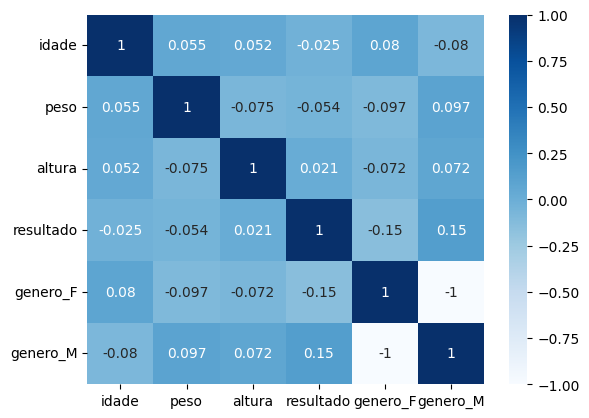

In [5]:
# Apresentar mapa d calor com a correlação entre as variáveis, precisa dar uma matriz de correlação como entrada n o caso o método corr do pandas

sns.heatmap(df_exames.corr(),annot=True,cmap="Blues")

<Axes: >

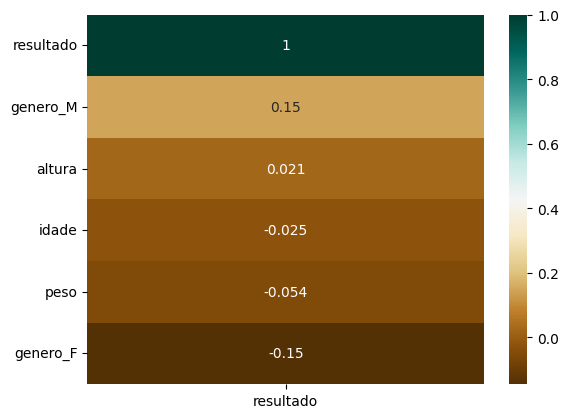

In [6]:
 sns.heatmap(df_exames.corr()[["resultado"]].sort_values(by="resultado", ascending=False),annot=True,cmap="BrBG")

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

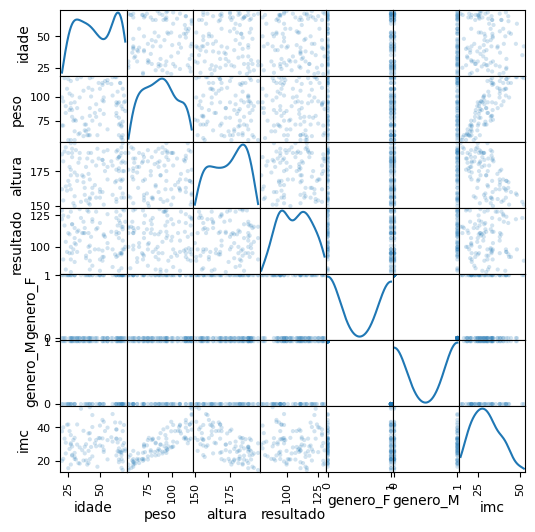

In [14]:
# Gráfico de disperção com uma visualização de distribuição - Plot Scatter
pd.plotting.scatter_matrix(df_exames,alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

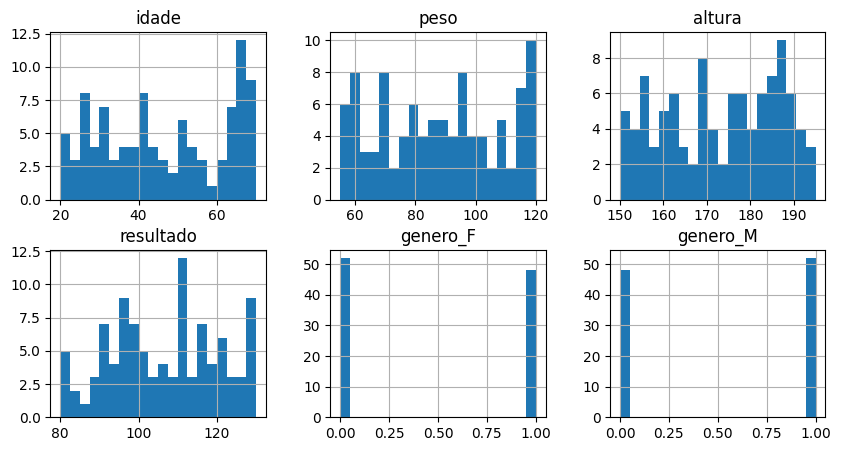

In [10]:
# Histograma de todas as variáveis

df_exames.hist(layout=(2,3),figsize=(10,5),bins=20)

In [11]:
# Criar uma feature nova
# IMC = peso(kg) / altura(m) ^2
df_exames["imc"]=(df_exames["peso"] / ((df_exames['altura']/100)**2))
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


<Axes: >

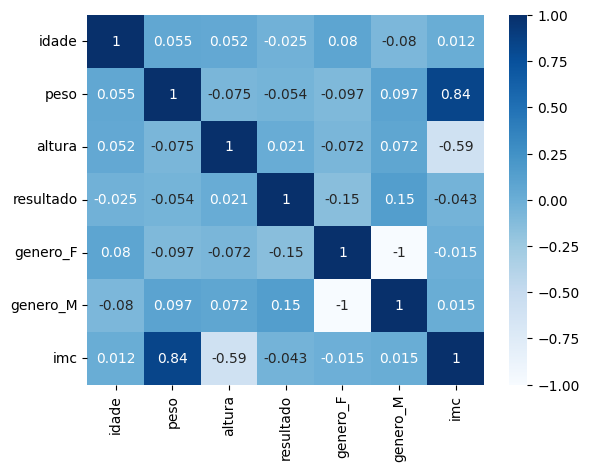

In [13]:
# Refazer mapa de calor com o IMC para ver se a nova matriz de correlação tem algo a nos mostrar
sns.heatmap(df_exames.corr(),annot=True,cmap="Blues")

#### Exemplo de regreção

In [16]:
dict_regressao = {'tempo casa':[1,3,6,9,10,14,18],'salario':[1500,3000,4500,6000,7000,8500,10000]}
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)
df_regressao_simples

,tempo casa,salario
0,1,1500
1,3,3000
2,6,4500
3,9,6000
4,10,7000
5,14,8500
6,18,10000


<Axes: xlabel='tempo casa', ylabel='salario'>

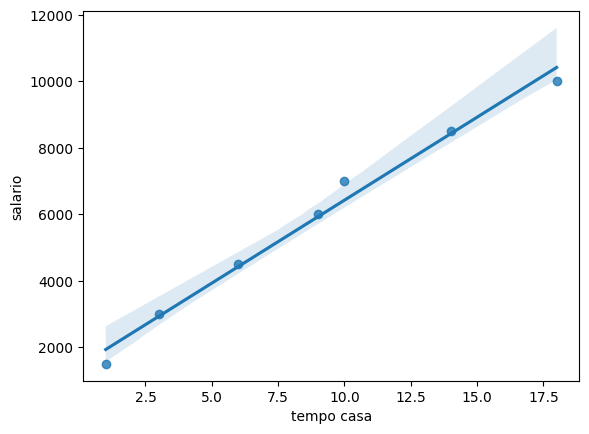

In [17]:
sns.regplot(x="tempo casa",y="salario",data=df_regressao_simples)

In [38]:
# Importar bibliotecas imporantes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Primeiro modelo utilizando várias variáveis como entrada da regressão

In [24]:
from re import X
# Modelo 1 - Sem IMC
X = df_exames.drop(columns=['imc','resultado'])
Y = df_exames["resultado"]

## Dividir o conjunto entre treino e teste

In [40]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size=0.7, random_state=42)


In [26]:
# Treinar algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [34]:
# Gerar predições do conjunto de testes com base no Modelo 1
Y_pred_1 = model_1.predict(X_test)
Y_pred_1

array([109.53843644, 109.06836921, 103.98171868, 104.1843919 ,
       109.33142279, 104.37079472, 108.59092886, 110.13727517,
       110.71104204, 110.20449926, 110.10771993, 109.54701756,
       102.60866308, 108.6400846 , 109.72842009, 109.38672985,
       103.92092242, 104.35650713, 102.81668613, 103.29145624,
       111.10235508, 104.38561087, 110.1960878 , 104.05544005,
       109.64010565, 103.52146861, 109.05080044, 104.52624598,
       104.36369099, 109.41003404])

In [28]:
# Equação da reta - regreção linear -> Y = a.X + b ou  Y = a.X1 + a.X2 + a.X3 + b

# Coeficientes "a" para cada elemento da reta, no caso para cada variável de entrada
model_1.coef_

array([ 0.03090395, -0.0037981 , -0.030631  , -3.07033188,  3.07033188])

In [29]:
# Coeficiente "b" da reta
model_1.intercept_

np.float64(111.0819434066655)

In [30]:
# R2 Score - Conjunto de treinamento
model_1.score(X_train,Y_train)

0.0449578867292838

In [31]:
# R2 Score - Conjunto de testes
model_1.score(X_test,Y_test)

-0.13658613297428301

In [37]:
r2_score(Y_test,Y_pred_1)

-0.13658613297428301

MAE (Mean Absolute Error)

In [39]:
mean_absolute_error(Y_test,Y_pred_1)

10.523662075021996

O teste MAE concluiu que o erro para cada caso é de 10.52 unidades do resultado de diabetes, o que é um valor alto de erro e poderia caracterizar alguem sem dibetes com ou o contrário. Já o teste R2 Score indicou que o modelo é muito ruim para descrever/variar como o Y de teste (-0.13).
> O R² varia de -∞ a 1, sendo:
- 1 indicando um ajuste perfeito do modelo aos dados;
- 0 significando que o modelo não explica nenhuma variação nos dados (equivalente a simplesmente prever a média dos valores reais);
- Valores negativos indicando que o modelo é pior do que simplesmente usar a média dos valores de ( Y ).


## Segundo modelo utilizando apenas IMC como entrada da regressão

In [41]:
X = pd.DataFrame(df_exames["imc"])
Y = df_exames["resultado"]

In [42]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size=0.7, random_state=42)

In [43]:
# Treinar o novo modelo de regressão linear- Modelo 2
model_2 = LinearRegression()
model_2.fit(X_train,Y_train)

LinearRegression()

In [49]:
# Gerar predição com base no modelo para o conjunto de testes
Y_pred_2 = model_2.predict(X_test)
Y_pred_2

array([106.90620538, 106.80132125, 106.64742151, 107.59559026,
       106.21521895, 106.26591025, 107.12184433, 106.76837589,
       108.0136382 , 106.95098258, 107.07036158, 107.63524533,
       106.60248985, 106.58396459, 107.12970615, 106.18154447,
       107.09996871, 107.70893918, 106.04892254, 107.38832641,
       106.87750848, 107.07037878, 107.14989009, 106.73292137,
       106.7157764 , 106.32924246, 106.50348997, 107.39381987,
       106.64774648, 106.23702222])

In [45]:
# Como é um modelo de regressão simples, só tem um "a" e um "b" na regressão
print("Coeficiente 'a':",model_2.coef_[0])
print("Coeficiente 'b':",model_2.intercept_)

Coeficiente 'a': 0.060438136190066244
Coeficiente 'b': 105.10842415677135


In [50]:
# R2 Score no conjunto de treinamento
model_2.score(X_train,Y_train)

0.0012928972156167617

In [47]:
# R2 Score no conjunto de testes
model_2.score(X_test,Y_test)

-0.05667934120992646

In [51]:
# MAE(Mean Absolute Error)
mean_absolute_error(Y_test,Y_pred_2)

9.906676504559353

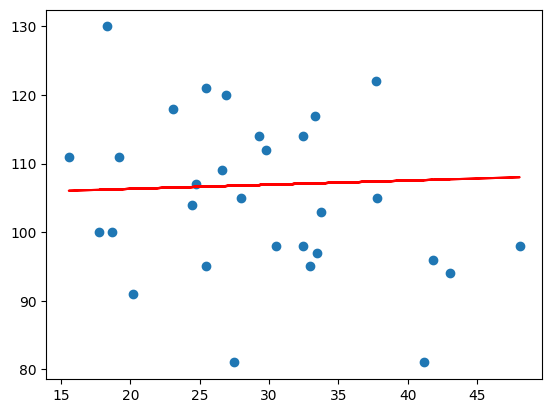

In [52]:
# Mostrar como o modelo prediz o teste
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred_2,color="red")

### Modelo pior que o antigo